In [69]:
%load_ext tensorboard
%tensorboard --logdir "C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\logs\\tuft11_5\\training"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import torch
from src.generator import Generator
from src.tuft_loader import Loader
from src.data import CustomDataset
from src.inference import visualize_image
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
loader = Loader(f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc')
X, y = loader.load()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

test_dataset = CustomDataset(X_test, y_test, transform=None)

In [3]:
model_name = 'tuft10'
inference_dir = f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\visualizations\\tests\\{model_name}\\'
Path(f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\visualizations\\tests\\{model_name}\\').mkdir(parents=True, exist_ok=True)
model = Generator().cuda()
model.load_state_dict(torch.load(f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\models\\{model_name}\\generator.pth', weights_only=True))

<All keys matched successfully>

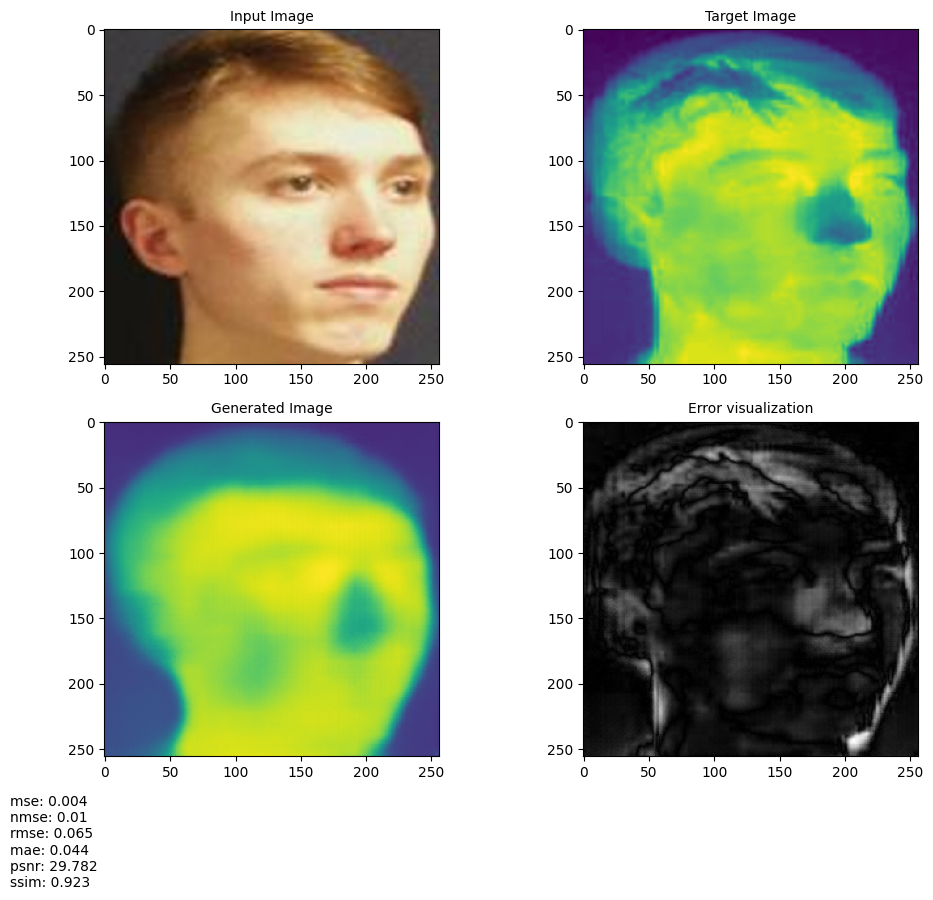

In [6]:
visualize_image(model.cuda(), test_dataset, image=0, metrics=True)

In [1]:
import torch
from src.generator import Generator
from src.data import Loader
from src.data import CustomDataset
from src.inference import visualize_image
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
loader = Loader("C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\woundsDB\\data\\")
X, y = loader.load()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

test_dataset = CustomDataset(X_test, y_test, transform=None)
test2 = CustomDataset(X_val, y_val, transform=None)

In [60]:
X_test, y_test = loader.load(folds=5)
test_dataset_2 = CustomDataset(X_test, y_test, transform=None)

In [61]:
model_name = 'tuft11_5_finetuned'
inference_dir = f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\visualizations\\tests\\{model_name}\\'
Path(f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\visualizations\\tests\\{model_name}\\').mkdir(parents=True, exist_ok=True)
model = Generator().cuda()
model.load_state_dict(torch.load(f'C:\\Users\\OL4F\\Desktop\\Inzynierka\\SimulatingModalities-BSc\\models\\{model_name}\\generator.pth', weights_only=True))

<All keys matched successfully>

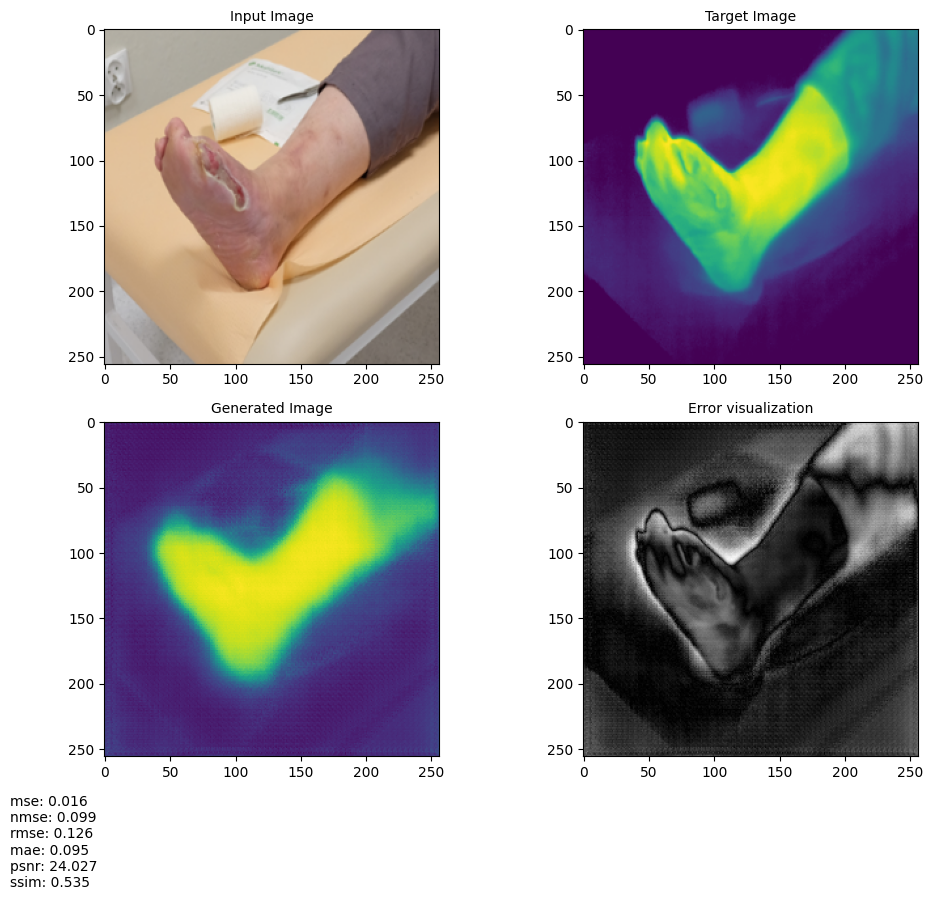

In [67]:
visualize_image(model.cuda(), test_dataset_2, image=5, metrics=True)
